# 1.1 EDA

In [1]:
#imports 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [2]:
#file paths 
movies = "ml-latest/movies.csv"
ratings = "ml-latest/ratings.csv"

#reading the files as DFs 
movies_df = pd.read_csv(movies,usecols=["movieId","title"],dtype={"movieId":"int32","title":"str"})
ratings_df = pd.read_csv(ratings,usecols=["userId","movieId","rating"],dtype={"movieId":"int32","rating":"float32","userId":"int32"})


In [3]:
#movies_df.head()
#movies_df.describe()
#movies_df.info()

#ratings_df.head()
#ratings_df.describe()
ratings_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int32  
 1   movieId  int32  
 2   rating   float32
dtypes: float32(1), int32(2)
memory usage: 317.6 MB


<AxesSubplot:xlabel='Rating'>

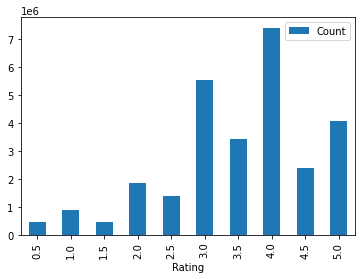

In [4]:
#ditribution of ratings 
rating_distribution = pd.DataFrame(ratings_df["rating"].value_counts()).rename(columns={"rating":"Count"})

rating_distribution["Rating"]=rating_distribution.index
rating_distribution = rating_distribution.sort_index(ascending=True)
rating_distribution.plot(kind="bar",x="Rating",y="Count")

<AxesSubplot:xlabel='Mean rating'>

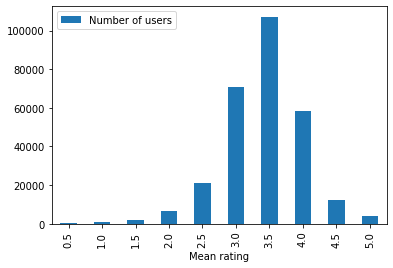

In [24]:
# mean rating for users distribution 

mean_rating_per_user = ratings_df[["userId","rating"]].groupby("userId").mean()

mean_rating_per_user["Mean rating"] = (2 * mean_rating_per_user["rating"]//1)/2
mean_rating_per_user = pd.DataFrame(mean_rating_per_user.groupby("Mean rating").size()).rename(columns={0:"Number of users"})
mean_rating_per_user.plot(kind="bar")

<AxesSubplot:xlabel='Max Rating'>

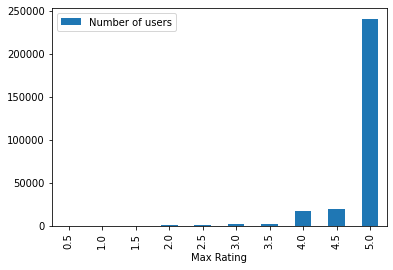

In [33]:
#max rating per user

max_rating_per_user = ratings_df[["userId","rating"]].groupby("userId").max().rename(columns={"rating":"Max Rating"})
max_rating_per_user = pd.DataFrame(max_rating_per_user.groupby("Max Rating").size()).rename(columns={0:"Number of users"})
max_rating_per_user.plot(kind="bar")

<AxesSubplot:xlabel='Mean rating'>

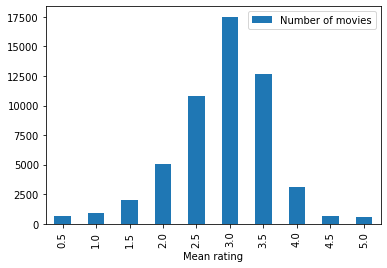

In [25]:
#mean rating per movie distribution

mean_rating_per_movie = ratings_df[["movieId","rating"]].groupby("movieId").mean()

mean_rating_per_movie["Mean rating"] = (2 * mean_rating_per_movie["rating"]//1)/2
mean_rating_per_movie = pd.DataFrame(mean_rating_per_movie.groupby("Mean rating").size()).rename(columns={0:"Number of movies"})
mean_rating_per_movie.plot(kind="bar")

<AxesSubplot:xlabel='Max Rating'>

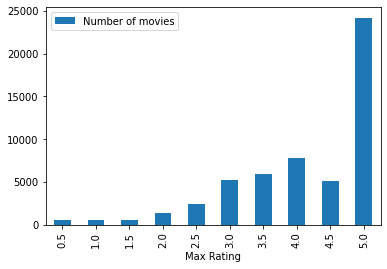

In [32]:
# max rating per movie distribution 

max_rating_per_movie = ratings_df[["movieId","rating"]].groupby("movieId").max().rename(columns={"rating":"Max Rating"})
max_rating_per_movie = pd.DataFrame(max_rating_per_movie.groupby("Max Rating").size()).rename(columns={0:"Number of movies"})
max_rating_per_movie.plot(kind="bar")

### The 10 movies with most ratings

In [6]:
top_10 = ratings_df["movieId"].value_counts()[:10]
top_10_list = top_10.index.tolist()

print("Top 10 movies :")
for movie_id,i in zip(top_10_list,range(1,11)) : 
    print(i," - ",movies_df[movies_df["movieId"]==movie_id]["title"].values[0])


Top 10 movies :
1  -  Shawshank Redemption, The (1994)
2  -  Forrest Gump (1994)
3  -  Pulp Fiction (1994)
4  -  Silence of the Lambs, The (1991)
5  -  Matrix, The (1999)
6  -  Star Wars: Episode IV - A New Hope (1977)
7  -  Jurassic Park (1993)
8  -  Schindler's List (1993)
9  -  Braveheart (1995)
10  -  Toy Story (1995)
